In [9]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
np.random.seed(1337)
X=np.linspace(-1,1,200)
np.random.shuffle(X)
y=2*X+np.random.randn(*X.shape)*0.33

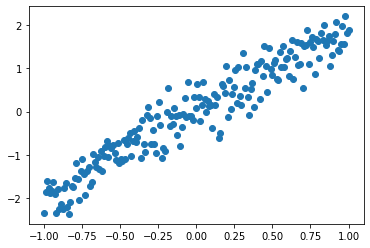

In [16]:
plt.scatter(X,y)

In [17]:
X_train,y_train=X[:160],y[:160]
X_test,y_test=X[160:],y[160:]

In [20]:
model=Sequential(name='SaiRam')
#1st HL with weights Uniformly distributed
model.add(Dense(units=1,input_dim=1,kernel_initializer='uniform',activation='linear'))
#2nd HL  
#model.add(Dense(units=6,activation='tanh',kernel_initializer=tf.keras.initializers.RandomNormal()))
#Define the output layer
model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='sgd')


In [21]:
model.summary()

Model: "SaiRam"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,epochs=100,verbose=1,validation_split=0.2)
#If we run the .fit method, we basically see the following o/p :
#Epoch 1/100
#4/4 [==============================] - 0s 29ms/step - loss: 0.1277 - val_loss: 0.1104
#If you observe, we get "4/4" for each Epoch, what does this mean? In .fit() method, we can provide "batch_size" for taking no. of data elements or rows of data in 1 batch, which is 32 by default. 
# Since we haven't specifid any batch_size, ist 32. Now with fit, we are using X_train, which has 160 rows of data, out of which we have 0.2(20%) assigned for validation, 
# which means we have 160-32(20%)=128 rows, Now these 128 rows are basically divided into batches, here each batch is of size 32(default). Hence we have totally 4 batches, 
# each of 32 rows totalling to 128 rows of data. 
# The flow is like in "each epoch", 
# the first batch of data is taken assigned a random weights calc y(hat) and then calc the error/Loss(MSE) ; Use GD to reduce teh loss and find teh new weights.
# Repeat for the other 3 batches 

Epoch 1/100
4/4 [==============================] - 0s 29ms/step - loss: 0.1277 - val_loss: 0.1104
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1273 - val_loss: 0.1097
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1270 - val_loss: 0.1090
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1266 - val_loss: 0.1083
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1265 - val_loss: 0.1077
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1261 - val_loss: 0.1071
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1258 - val_loss: 0.1065
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1256 - val_loss: 0.1059
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1254 - val_loss: 0.1053
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1251 - val_loss: 0.1048
Epoch 11/100
4/4 [=

In [25]:
weights=model.layers[0].get_weights()

In [26]:
weights

[array([[1.9071903]], dtype=float32), array([0.04282458], dtype=float32)]

In [28]:
#1=> Bias 0=> weights
weights[1]

array([0.04282458], dtype=float32)

In [29]:
#weights[layers][neurons][connections/I/p from prev layers]
#Let's taken an example to understand this
model1=Sequential(name="Weights matrix demo")
model1.add(Dense(units=3,input_dim=2,activation='relu'))
model1.compile(loss='mse',optimizer='sgd')

In [30]:
weights=model1.layers[0].get_weights()

In [31]:
weights

[array([[-0.61688185,  0.22913778,  0.42107964],
        [ 0.90082   ,  0.9198735 , -0.984895  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [32]:
weights[0][1][0] #Here we are saying that with first index, we want the weights and not the bias(#1=> Bias 0=> weights), 2nd index is saying that we want 2nd neuron data, In that 2nd neuron, I want the 1st connection data.

0.90082

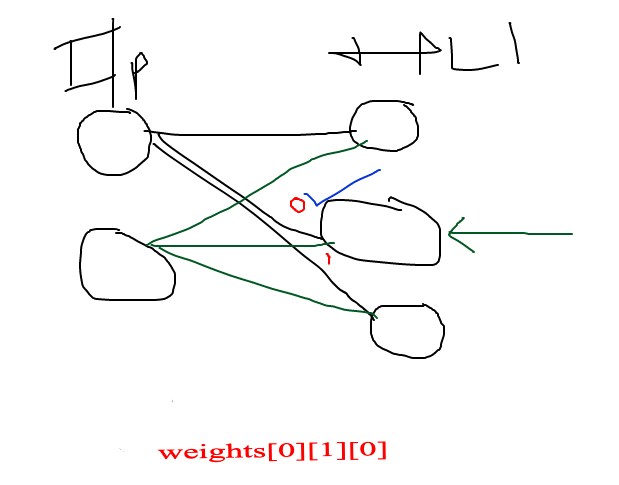

In [33]:
y_pred=model.predict(X_test)

In [2]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
X,y=make_moons(n_samples=100,noise=0.2,random_state=1)

In [4]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [16]:
X_train,X_test=X[:30,:],X[30:,:]
Y_train,Y_test=y[:30],y[30:]

In [17]:
#Architecture build
model=Sequential()
model.add(Dense(units=500,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history=model.fit(X_train,Y_train,epochs=4000,verbose=0,validation_data=(X_test,Y_test))

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
#Model evaluation
#The return values are Loss and list of Metrics (This list would be decided by the metrics that you would have declared in compile method)
loss,train_acc=model.evaluate(X_train,Y_train,verbose=0)
loss_1,test_acc=model.evaluate(X_test,Y_test,verbose=0)

In [28]:
print('Train and Test accuracy are {0} and {1} respectively'.format(train_acc,test_acc))

Train and Test accuracy are 1.0 and 0.9142857193946838 respectively


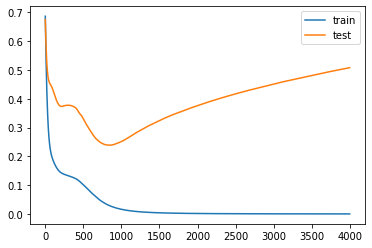

In [29]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

Epoch 00233: early stopping


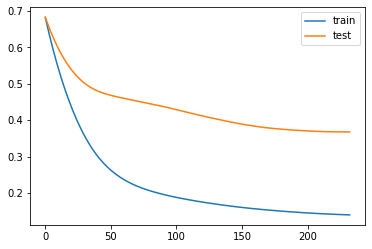

In [32]:
#We can see from the above plot that the val loss have initially (~100/150 epochs) seems to be lowest, 
#however since there was no callbacks like early stopping, the execution went ahead for all the 4000 epochs, 
#however we could see that further almost ~800 epochs the val_loss seems to be the lowest and then starts elevating again and 
#hence we can stop at or around 800 epochs, which our EarlyStopping CS would be able to achieve.

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1)
history_es=model.fit(trainX,trainy,verbose=0,epochs=4000,validation_data=(testX,testy),callbacks=[es])

plt.plot(history_es.history['loss'],label='train')
plt.plot(history_es.history['val_loss'],label='test')
plt.legend()
plt.show()

In [35]:
#However in the above plot, we can see that the Early stooping seems to have hit at or around 200 epochs itself, 
#however as per our analysis, this should have been at or around 800 from the first graph. 
# This is because the default patience for Early stopping is "1", which means that the the callback 
# function just look ahead for 1 more validation score/loss and decide to stop. 
# Hence let's increase the patience to some level, may be >233 as we could see that the early stopping was done at 233.
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_patience_233=EarlyStopping(monitor='val_loss',verbose=1,patience=233,mode='min')
history_es_233=model.fit(trainX,trainy,epochs=4000,verbose=0,validation_data=(testX,testy),callbacks=[es_patience_233])

Epoch 01082: early stopping


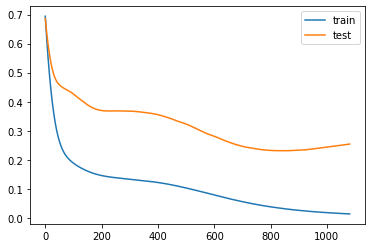

In [36]:
plt.plot(history_es_233.history['loss'],label='train')
plt.plot(history_es_233.history['val_loss'],label='test')
plt.legend()
plt.show()

In [38]:
#Now lets see as how to take a checkpoints of val_accuracy, so that we can know at which epochs the val_accuracy was improved.
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es_patience_233=EarlyStopping(monitor='val_loss',verbose=1,patience=233,mode='min')
#Checkpoint the model for max val_loss
from keras.callbacks import ModelCheckpoint
mc= ModelCheckpoint('/content/sample_data_best_model.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

history_es_233_mc=model.fit(trainX,trainy,epochs=4000,verbose=0,validation_data=(testX,testy),callbacks=[es_patience_233,mc])




Epoch 00001: val_accuracy improved from -inf to 0.72857, saving model to /content/sample_data_best_model.h5

Epoch 00002: val_accuracy did not improve from 0.72857

Epoch 00003: val_accuracy did not improve from 0.72857

Epoch 00004: val_accuracy did not improve from 0.72857

Epoch 00005: val_accuracy did not improve from 0.72857

Epoch 00006: val_accuracy did not improve from 0.72857

Epoch 00007: val_accuracy did not improve from 0.72857

Epoch 00008: val_accuracy did not improve from 0.72857

Epoch 00009: val_accuracy did not improve from 0.72857

Epoch 00010: val_accuracy did not improve from 0.72857

Epoch 00011: val_accuracy did not improve from 0.72857

Epoch 00012: val_accuracy did not improve from 0.72857

Epoch 00013: val_accuracy did not improve from 0.72857

Epoch 00014: val_accuracy did not improve from 0.72857

Epoch 00015: val_accuracy did not improve from 0.72857

Epoch 00016: val_accuracy did not improve from 0.72857

Epoch 00017: val_accuracy did not improve from 0.7